# Model development
Notebook overview:
- create benchmark model
- error metrics
- build model
- train
- evaluate
- deploy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
nasdaq_train = pd.read_csv('../data/train_nasdaq.csv', index_col=0)
nasdaq_test = pd.read_csv('../data/test_nasdaq.csv', index_col=0)

In [43]:
eurusd_train = pd.read_csv('../data/train_eurusd.csv', index_col=0)
eurusd_test = pd.read_csv('../data/test_eurusd.csv', index_col=0)

# Benchmark
Simple Moving Average forecasting:

In [63]:
class MA_regressor:
    def __init__(self, N=5):
        self.N = N
    
    def forward(self, price):
        return price[-self.N:].sum() / self.N
    
    def predict(self, data, steps=10):
        data = data['Close'].values
        predictions = [0] * steps
        for i in range(0,steps):
            predictions[i] = self.forward(np.append(data, predictions[:i]))
        return predictions

In [69]:
sample, steps = 20, 10
benchmark = MA_regressor(15)
y = benchmark.predict(nasdaq_train.iloc[:sample], steps)

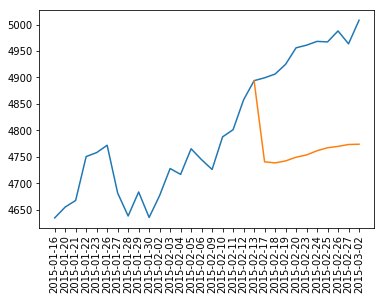

In [70]:
plt.xticks(rotation='vertical')
plt.plot(nasdaq_train.iloc[:sample+steps]['Close'])
y_series = nasdaq_train.iloc[sample-1:sample+steps]['Close'].copy()
y_series.iloc[1:] = y
plt.plot(y_series)

# Metrics
Because this is an regression problem, we need a loss function describing how far we are from the correct answer.
I propose an $MSE$ metric with a sum reduction:

\begin{equation}
MSE_i = \frac{1}{2} \left( y_i - \hat{y}_i \right)^2 + MSE_{i+1}
\end{equation}

It will allow us to compute a gradient that moves towards a better solution.